In [104]:
import numpy as np
import pandas as pd
from scipy.sparse import lil_matrix

from scipy.sparse.linalg import spsolve

from numpy.linalg import solve, norm

from numpy.random import rand
from time import sleep
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [33]:
snakes_ladders_map = [(2,23),(8,34),(20,77),(32,68),(41,79),(74,88),(85,95),(82,100),
                     (29,9),(38,15),(47,5),(53,33),(86,54),(97,25),(92,70)] 
snakes_ladders_map = np.array(snakes_ladders_map) - 1
snakes_ladders_map_arg = snakes_ladders_map[:,0]
# snakes_ladders_map

In [88]:
n = 100
Transitions_matrix = lil_matrix((n,n))
for row in range(n):
    for col in range(1,7):
        if row+col > 99:
            break
        else:
            Transitions_matrix[row,row+col] = 1/6
for el in snakes_ladders_map:
    for i in range(1,7):
        row,col = el[0],el[1]
        if row - i < 0:
            break
        else:
            Transitions_matrix[row - i,row] = 0.0
            Transitions_matrix[row - i,col] = 1/6
for row in range(94,99):
    self_prob = (6 - (99 - row))/6
    Transitions_matrix[row,row] = self_prob
Transitions_matrix[99,99] = 1

In [89]:
Transitions_matrix[99].toarray()

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1.]])

In [92]:
def simulate_game():
    n = 100
    terminal_state = 99
    s = 0
    t = 0
    all_states = np.arange(n)
    while s != terminal_state:
        s = np.random.choice(all_states,p=Transitions_matrix[s].toarray()[0])
        t += 1
    return t
        
        
    

In [ ]:
n_simulations = 10000
T = []
for _ in range(n_simulations):
    T.append(simulate_game())


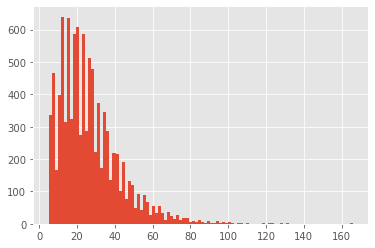

In [108]:
plt.hist(T,bins= 100)
plt.show()

In [109]:
np.array(T).mean()


26.6278

In [69]:
Transitions_matrix[0,:].toarray()[0]

array([0.        , 0.        , 0.16666667, 0.16666667, 0.16666667,
       0.16666667, 0.16666667, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.16666667, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [71]:
all_states

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98])